In [4]:
import pandas as pd
import numpy as np
import sys

from datetime import datetime
import time

from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


%matplotlib inline

from math import log
from collections import Counter
import re


import os, sys, email,re
import numpy as np 
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')


# Network analysis
import networkx as nx

# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output

# Network analysis
import networkx as nx
# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output
import os, sys, email,re
import numpy as np 
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('whitegrid')
#import wordcloud

# Network analysis
import networkx as nx

# NLP
from nltk.tokenize.regexp import RegexpTokenizer

from subprocess import check_output

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.stem.porter import PorterStemmer
%matplotlib inline
%pylab inline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.lda import LDA
from sklearn.decomposition import LatentDirichletAllocation
import random
import email
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.cross_validation import train_test_split
from sklearn.decomposition import TruncatedSVD

from scipy.sparse import coo_matrix, hstack
import glmnet_python
from glmnet import glmnet

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Populating the interactive namespace from numpy and matplotlib


C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module 

In [5]:
emails_df = pd.read_csv('Enron_data_2000.csv')
emails_df = emails_df.drop(['Message-ID', 'X-Folder', 'X-cc', 'X-bcc', 'X-To', 'X-From', 'user', 'X-Origin', 'X-FileName'], axis = 1)
emails_df = emails_df.drop_duplicates(subset=None, keep='first', inplace=False)
emails_df.index = range(len(emails_df))
emails_df.head()

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,From,To,Subject,content,TimeAll,Year
0,2000-01-01 14:36:00,['sally.beck@enron.com'],['fernley.dyson@enron.com'],Happy New Year - No Y2K Fear!,We are wrapping up several hours in the office...,946726560.0,2000
1,2000-01-01 19:17:00,['lenos@ucy.ac.cy'],['gordon.sick@rogroup.com'],Program attached; March NY RO Conference/Parti...,The current version of the conference program ...,946743420.0,2000
2,2000-01-02 13:12:00,['andrew.parsons@enron.com'],"['philippe.bibi@enron.com', 'mark.palmer@enron...",Summary of Y2K Glitches,Following please find a summary of the minor Y...,946807920.0,2000
3,2000-01-03 06:17:00,['emoler@velaw.com'],"['steven.kean@enron.com', 'cynthia.sandherr@en...",Options Memo,Here's the options memo you requested. Happy ...,946869420.0,2000
4,2000-01-03 08:20:00,['steven.kean@enron.com'],['maureen.mcvicker@enron.com'],Re: Additions to Working Groups,yes -- just make sure the working group lead...,946876800.0,2000


In [9]:
len(set([x[0] for x in emails_df.From.values]))

1

In [7]:
emails_df.head(1)

,Date,From,To,Subject,content,TimeAll,Year
0,2000-01-01 14:36:00,['sally.beck@enron.com'],['fernley.dyson@enron.com'],Happy New Year - No Y2K Fear!,We are wrapping up several hours in the office...,946726560.0,2000


In [6]:
def change_subject(subject_text):
    subject_text = str(subject_text).lower()
    if subject_text[:3] == 're:':
        subject_text = subject_text[4:]
    if subject_text == '':
        return 'nan'
    return subject_text

In [7]:
emails_df['Subject'] = emails_df['Subject'].apply(lambda x: change_subject(x))

In [6]:
emails_df

,Date,From,To,Subject,content,TimeAll,Year
0,2000-01-01 14:36:00,['sally.beck@enron.com'],['fernley.dyson@enron.com'],happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000
1,2000-01-01 19:17:00,['lenos@ucy.ac.cy'],['gordon.sick@rogroup.com'],program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000
2,2000-01-02 13:12:00,['andrew.parsons@enron.com'],"['philippe.bibi@enron.com', 'mark.palmer@enron...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000
3,2000-01-03 06:17:00,['emoler@velaw.com'],"['steven.kean@enron.com', 'cynthia.sandherr@en...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000
4,2000-01-03 08:20:00,['steven.kean@enron.com'],['maureen.mcvicker@enron.com'],additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000
5,2000-01-03 08:33:00,['steven.kean@enron.com'],['paul.kaufman@enron.com'],testimony in pge proceeding,I won't be able to attend. Let me know if I n...,946877580.0,2000
6,2000-01-03 09:29:00,['john.lavorato@enron.com'],['cliff.lawrick@enron.com'],nan,Cliff I want to add a seat between Chad and th...,946880940.0,2000
7,2000-01-03 09:32:00,['chris.dorland@enron.com'],['jean.bell@enron.com'],reliant energy,The tag number on this deal is N67904.2\r\n\r\...,946881120.0,2000
8,2000-01-03 09:41:00,['john.lavorato@enron.com'],['david.oxley@enron.com'],nan,David\r\n\r\nI'm going to extend and offer to ...,946881660.0,2000
9,2000-01-03 09:44:00,['john.lavorato@enron.com'],['dawn.doucet@enron.com'],nan,"Dawn, call me on Lambie and Brodeur.",946881840.0,2000


In [23]:
ch = []
for c in emails_df.From.values:
    ch.append(c[0])

In [15]:
emails_df.From.values[0][0]

'['

In [7]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65982 entries, 0 to 65981
Data columns (total 7 columns):
Date       65982 non-null object
From       65982 non-null object
To         65982 non-null object
Subject    65982 non-null object
content    65982 non-null object
TimeAll    65982 non-null float64
Year       65982 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.5+ MB


In [8]:
dict_hw = {}
file_hw = open('hier_words.txt')
for st in file_hw.readlines():
    lst_st = st.split()
    weigh = lst_st[-1]
    lst_st.remove(weigh)
    dict_hw[' '.join(lst_st)]=weigh
    

In [8]:
dict_hw

{'have you been': '-8.46614335712567',
 'to manage the': '-6.66945570122528',
 'you gave': '-6.64210570657968',
 'sender_kitchen': '-6.04623333207432',
 'lets discuss': '-5.72362776032607',
 'we are in': '-5.44488699181268',
 'publicly': '-5.24539180922239',
 'title': '-5.05002079531502',
 'promotion': '-5.02996664071749',
 'include the': '-4.82601348607844',
 'need in': '-4.80806558268773',
 'good one': '-4.62452560329102',
 'opened': '-4.57885956153461',
 'determine the': '-4.47895064626732',
 'initiatives': '-4.38690175958595',
 'is difficult': '-4.36140740430373',
 '. i would': '-4.34303518420259',
 'man': '-4.26907578872594',
 'we will probably': '-4.12325700642365',
 'number we': '-4.1130357559842',
 'sender_delainey': '-4.10676407156845',
 'any comments': '-4.06872897631117',
 'contact you': '-4.05581747833457',
 'you said': '-3.9992372028138',
 'the problem is': '-3.9761534907043',
 'i left': '-3.88710812224951',
 'you did': '-3.78940983635193',
 'sender_lavorato': '-3.75863697

In [9]:
max_hw = max(list(dict_hw.values()))
min_hw = min(list(dict_hw.values()))
dict_hw_new = {}
for k, v in dict_hw.items():
    if v == '0':
        dict_hw_new[k] = 0
        continue
    dict_hw_new[k] = float(v[:-4])

In [10]:
max_hw = max(list(dict_hw_new.values()))
min_hw = min(list(dict_hw_new.values()))
dict_hw_norm = {}
for k, v in dict_hw_new.items():
        dict_hw_norm[k] = (v - min_hw)/(max_hw - min_hw)

In [11]:
emails_df['Date'] = pd.to_datetime(emails_df['Date'])
emails_df['To'] = emails_df['To'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df['From'] = emails_df['From'].apply(lambda x: frozenset(x[1:-1].split(',')))

###### Количество сообщений за год

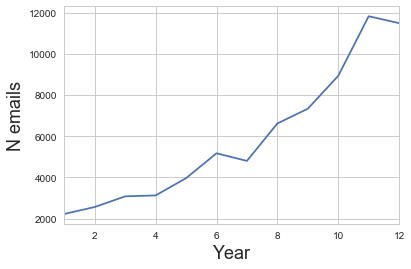

In [62]:
ax = emails_df.groupby(emails_df['Date'].dt.month)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

###### Количество сообщений в течение недели

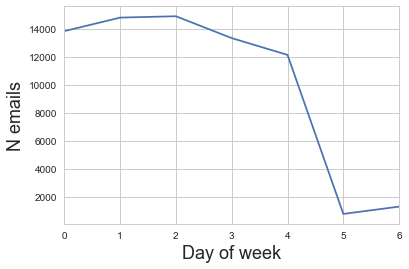

In [63]:
ax = emails_df.groupby(emails_df['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

###### Количество сообщение в теччение дня

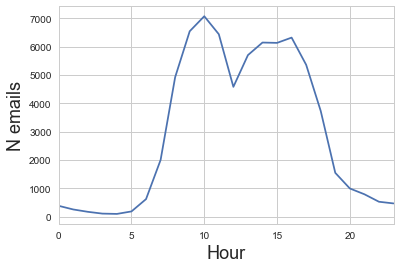

In [64]:
ax = emails_df.groupby(emails_df['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

###### Сообщения работников

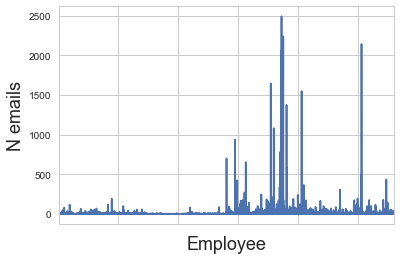

In [65]:
ax = emails_df.groupby(emails_df['From'])['content'].count()
ax=ax.plot()
ax.set_xticklabels([])
ax.set_xlabel('Employee', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

###### Кто кому сколько отправляет сообщений (один получатель)

In [66]:
sub_df = emails_df[['From', 'To', 'Date']].dropna()
print(sub_df.shape)
sub_df = sub_df.loc[sub_df['To'].map(len) == 1]
print(sub_df.shape)

(71109, 3)
(51260, 3)


In [67]:
emails_df['To'][10]

frozenset({"'john.sherriff@enron.com'"})

In [68]:
sub_df = sub_df.groupby(['From', 'To']).count().reset_index()

sub_df['From'] = sub_df['From'].map(lambda x: next(iter(x)))
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))

sub_df.rename(columns={'Date': 'count'}, inplace=True)
sub_df.sort('count', ascending=False).head(10)

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,From,To,count
8209,'vince.kaminski@enron.com','vkaminski@aol.com',634
10954,'enron.announcements@enron.com','all.worldwide@enron.com',451
10961,'enron.announcements@enron.com','all.houston@enron.com',283
14169,'kay.mann@enron.com','suzanne.adams@enron.com',228
8221,'vince.kaminski@enron.com','shirley.crenshaw@enron.com',224
6785,'leslie.hansen@enron.com','tana.jones@enron.com',223
5992,'office.chairman@enron.com','all.worldwide@enron.com',185
3642,'jeffrey.shankman@enron.com','jennifer.burns@enron.com',162
6171,'matthew.lenhart@enron.com','shelliott@dttus.com',130
8827,'drew.fossum@enron.com','martha.benner@enron.com',123


###### Отправление писем и ответы на письма

In [69]:
# Make a network of email sender and receipients
G = nx.from_pandas_dataframe(sub_df, 'From', 'To', edge_attr='count', create_using=nx.DiGraph())
print('Number of nodes: %d, Number of edges: %d' % (G.number_of_nodes(), G.number_of_edges()))

Number of nodes: 8030, Number of edges: 16533


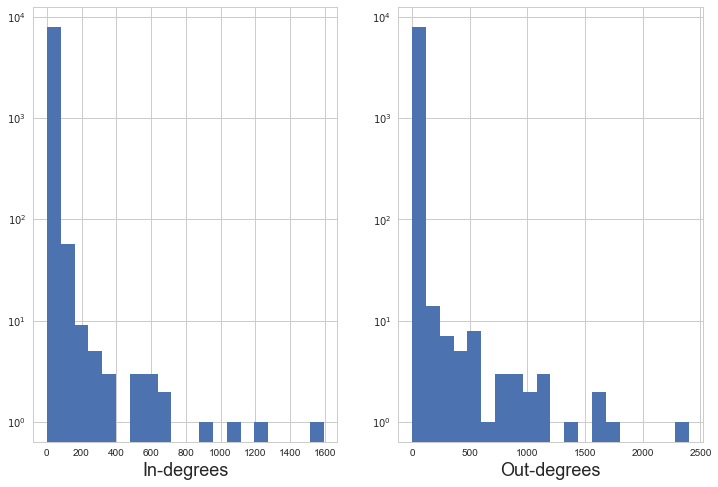

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 8))
ax1.hist(list(G.in_degree(weight='count').values()), log=True, bins=20)
ax1.set_xlabel('In-degrees', fontsize=18)

ax2.hist(list(G.out_degree(weight='count').values()), log=True, bins=20)
ax2.set_xlabel('Out-degrees', fontsize=18)

###### О чем говорят в темах сообщений 

(-0.5, 799.5, 599.5, -0.5)

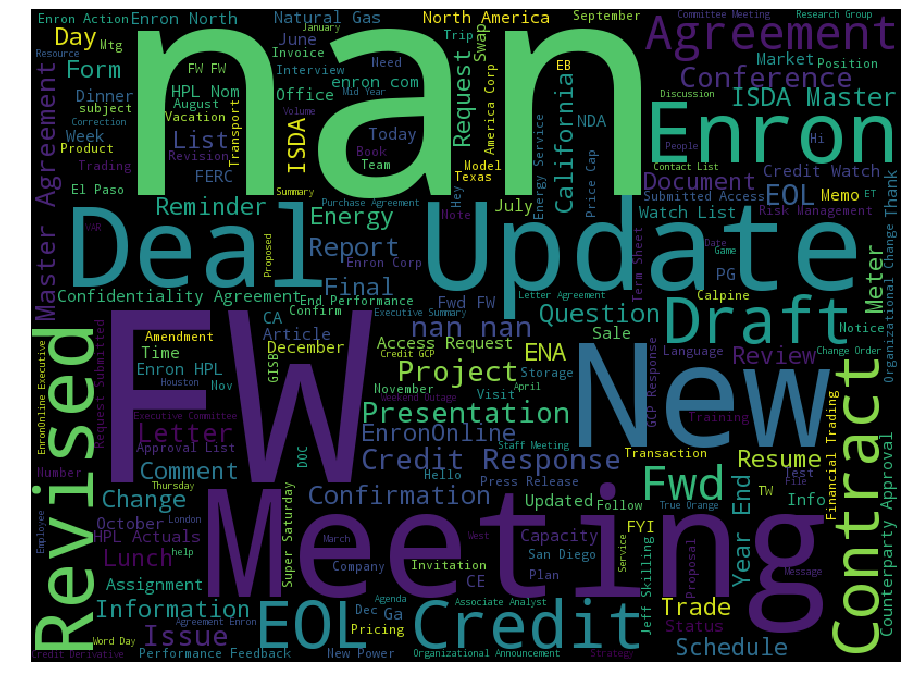

In [71]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

subjects = ' '.join(str(v) for v in emails_df['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

###### О чем говорят в сообщениях

(-0.5, 799.5, 599.5, -0.5)

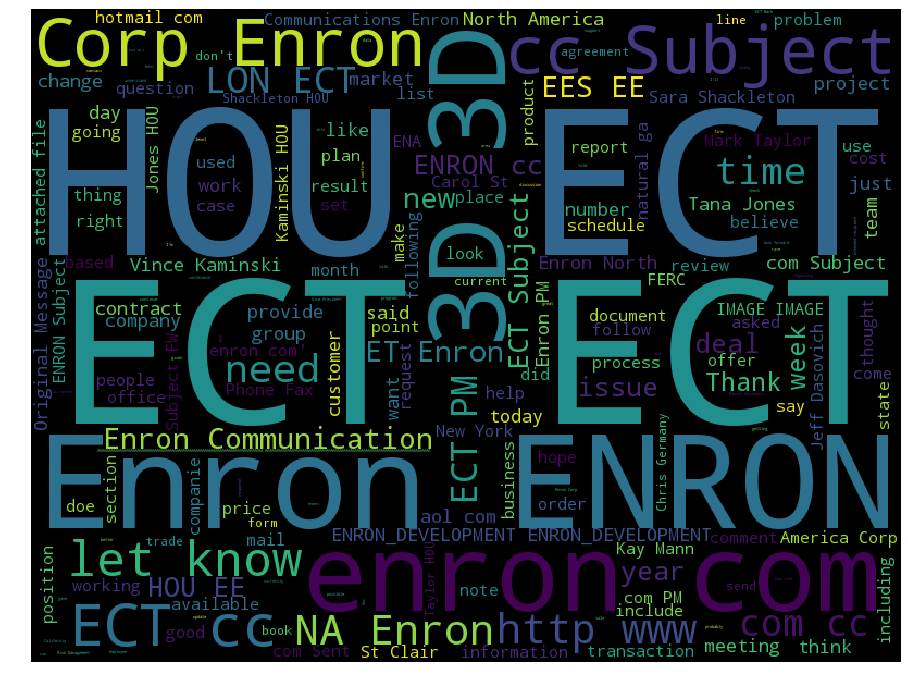

In [72]:
contents = ' '.join(str(v) for v in emails_df.sample(20000)['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(contents)
ax.imshow(wc)
ax.axis("off")

###### Чистка сообщений

In [26]:
def clean(text):
    stop = set(stopwords.words('english'))
    stop.update(("to","cc","subject","http","from","sent","aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    porter= PorterStemmer()
    
    text=text.rstrip()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    stop_free = " ".join([i for i in text.lower().split() if((i not in stop) and (not i.isdigit()) and (len(i)>2))])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    #stem = " ".join(porter.stem(token) for token in normalized.split())
    
    return normalized

In [27]:
emails_df['clean_content'] = emails_df['content'].apply(lambda x: clean(x))

###### Нахождение степени иерархичности сообщения

In [28]:
words = list(dict_hw.keys())
def creat_dict_word_cos(content):
    dict_word_cos = {}
    sentenses = content.split('.')
    if len(sentenses) == 1:
        text = clean(content).split()
    
    else:   
        clean_sentenses = []
        for sentense in sentenses:
            clean_sentense = clean(sentense)
            if len(clean_sentense) == 0:
                continue
            else:
                clean_sentenses.append(clean_sentense.split())
        text = clean_sentenses 
    if len(text) == 0:
        return 0
    try:
        model = gensim.models.Word2Vec(text, min_count=1, workers=2)
    except:
        print('text:', text)
        print('contenct:', content)
    dict_word_cos = {}
    for word in words:
        if word in model:
            for i in model.most_similar(positive=[word], topn=1):
                #print(word, '|', i[0], i[1])
                dict_word_cos[word]=i[1]
    return dict_word_cos

In [29]:
def find_weigh(dict_word_cos):
    if dict_word_cos == 0:
        return 0
    lst_weigh = []
    for k, v in dict_word_cos.items():
        if dict_hw[k] != '0':
            lst_weigh.append(float(dict_hw[k]))
    return np.mean(lst_weigh)

In [30]:
emails_df['weigh_content'] = emails_df['content'].apply(lambda x:find_weigh(creat_dict_word_cos(x)))

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [31]:
emails_df = emails_df.fillna(0)

##### Определение тредов 1 способом

1й способ является строгим способом определения треда: тредом является цепочка сообщений с одинаковой темой, в которой получатели и отправители содержат в себе тех людей, которые начали цепочку первыми

In [32]:
emails_df['Index'] = list(emails_df.index)

In [33]:
set_sub = list(set(emails_df['Subject']))
dict_ind_thread = {}
ind_thread = 1
for sub in set_sub:
    if sub == 'nan' or sub == '':
        df_s = emails_df[emails_df.Subject == sub]
        list_ind = list(df_s['Index'])
        for i in list_ind:
            dict_ind_thread[i] = 0
        #print(i, dict_ind_thread[i])
        continue
        
    df_s = emails_df[emails_df.Subject == sub]
    if len(df_s) == 1:
        dict_ind_thread[df_s['Index'].values[0]] = ind_thread
        ind_thread += 1
        continue
    
    sub_list_from = list(df_s['From'])
    sub_list_to = list(df_s['To'])
    list_ind = list(df_s['Index'])
    for f, t, ind in zip(range(len(sub_list_from)), range(len(sub_list_to)), range(len(list_ind))):
        if list_ind[ind] in dict_ind_thread:
            continue
        dict_ind_thread[list_ind[ind]] = ind_thread

        set_to = sub_list_to[t]
        set_from = sub_list_from[f]
        for f_next, t_next, ind_next in zip(sub_list_from[f:], sub_list_to[t:], list_ind[ind:]):
            if (len(set_to.intersection(f_next)) !=0 and len(set_from.intersection(t_next)) !=0) or (len(set_to.intersection(t_next)) !=0 and len(set_from.intersection(f_next)) !=0):
                if list_ind[ind] in dict_ind_thread:
                    dict_ind_thread[ind_next] = ind_thread
        ind_thread += 1

In [34]:
emails_df['Number_of_thread']  = emails_df['Index'].apply(lambda x: dict_ind_thread[x])

In [35]:
import csv
emails_df.to_csv('emails_dataset_2000.csv', index = False)

###### Исследование тредов

In [12]:
emails_df = pd.read_csv('emails_dataset_2000.csv')
#emails_df = emails_df.drop('Unnamed: 0', axis = 1)
emails_df['Date'] = pd.to_datetime(emails_df['Date'])
emails_df['To'] = emails_df['To'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df['From'] = emails_df['From'].apply(lambda x: frozenset(x[1:-1].split(',')))
emails_df.head()

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread
0,2000-01-01 14:36:00,"(rozenset({""'sally.beck@enron.com'""})","(rozenset({""'fernley.dyson@enron.com'""})",happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000,wrapping several hour office tested commodity ...,0.406400,0,31817
1,2000-01-01 19:17:00,"(rozenset({""'lenos@ucy.ac.cy'""})","(rozenset({""'gordon.sick@rogroup.com'""})",program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000,current version conference program attached pl...,0.186760,1,196
2,2000-01-02 13:12:00,"(rozenset({""'andrew.parsons@enron.com'""})","( "" 'mark.koenig@enron.com'"", "" 'joseph.sutto...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000,following please find summary minor related gl...,0.950536,2,2276
3,2000-01-03 06:17:00,"(rozenset({""'emoler@velaw.com'""})","( "" 'cynthia.sandherr@enron.com'""}, rozenset({...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000,option memo requested happy new year betsy doc...,0.000000,3,14978
4,2000-01-03 08:20:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'maureen.mcvicker@enron.com'""})",additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000,yes make sure working group leader know mauree...,-0.324299,4,47838


In [ ]:
len(emails_df)

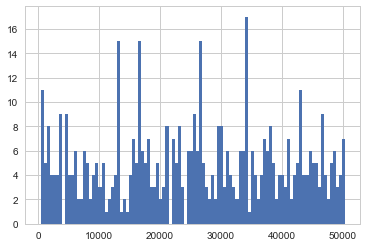

In [43]:
plt.hist(emails_df[emails_df.Number_of_thread != 0]['Number_of_thread'][:500], bins = 100)
plt.show()

In [44]:
emails_df[emails_df.Number_of_thread == 47386]

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread
46207,2000-11-03 12:00:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,"Kay, can you handle this stuff for me. thxs\r\...",973242000.0,2000,kay handle stuff thxs regard delainey forwarde...,-0.065585,46207,47386
46966,2000-11-06 18:45:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,973525500.0,2000,forwarded david w delainey hou ect pm wayne ma...,-0.101596,46966,47386
47035,2000-11-07 08:03:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,973573380.0,2000,forwarded david w delainey hou ect vkamins enr...,-0.101596,47035,47386
47037,2000-11-07 08:05:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,973573500.0,2000,forwarded david w delainey hou ect wayne may e...,-0.101596,47037,47386
47212,2000-11-07 12:05:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,973587900.0,2000,forwarded david w delainey hou ect pm robert p...,-0.101596,47212,47386
47690,2000-11-08 11:52:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,973673520.0,2000,forwarded david w delainey hou ect scott josey...,0.161362,47690,47386
48377,2000-11-09 17:28:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,973780080.0,2000,forwarded david w delainey hou ect pm rob miln...,-0.101596,48377,47386
49000,2000-11-12 15:51:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,974033460.0,2000,forwarded david w delainey hou ect pm ccalger ...,-0.101596,49000,47386
49239,2000-11-13 11:49:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,974105340.0,2000,forwarded david w delainey hou ect c john thom...,0.161362,49239,47386
49240,2000-11-13 11:49:00,"(rozenset({""'david.delainey@enron.com'""})","(rozenset({""'kay.chapman@enron.com'""})",approval for reviewer,---------------------- Forwarded by David W De...,974105340.0,2000,forwarded david w delainey hou ect sally beck ...,0.161362,49240,47386


Исследование зависимости длины треда от веса иерархичности сообщения

In [24]:
lst_w = []
len_sub = []
set_thread = list(set(emails_df.Number_of_thread))
for n in set_thread:
    if n == 0:
        continue
    df = emails_df[emails_df.Number_of_thread == n]
    if len(df) == 1:
        continue
    len_sub.append(len(df))
    lst_w.append(np.std(df['weigh_content']))    

In [25]:
df_n = pd.DataFrame()
df_n['w'] = lst_w
df_n['l'] = len_sub
df_n = df_n.sort_values(by = 'w')
df_n

,w,l
6821,0.000000,2
902,0.000000,2
5562,0.000000,2
900,0.000000,2
4198,0.000000,2
898,0.000000,2
5563,0.000000,2
1985,0.000000,2
903,0.000000,2
1986,0.000000,2


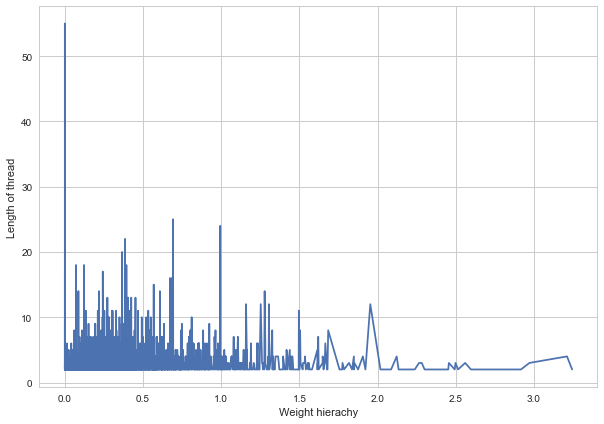

In [30]:
figure(figsize=(10, 7))
plt.plot(df_n['w'], df_n['l'],   '-')
plt.xlabel('Weight hierachy')
plt.ylabel('Length of thread')
plt.show()

Исследование зависимости объема сообщений от веса иерархичности

In [35]:
lst_weight = []
lst_volume = []
set_thread = list(set(emails_df.Number_of_thread))
for _, raw in emails_df.iterrows():
    weight = raw['weigh_content']
    content = raw['clean_content']
    lst_content = str(content).split(' ')
    lst_weight.append(weight)
    lst_volume.append(len(lst_content))   

In [36]:
df_n = pd.DataFrame()
df_n['w'] = lst_weight
df_n['v'] = lst_volume
df_n = df_n.sort_values(by = 'w')
df_n

,w,v
62769,-5.245392,10
62182,-5.245392,10
5468,-5.050021,25
23059,-5.050021,9
23058,-5.050021,10
27099,-5.050021,53
14852,-5.050021,41
16806,-5.050021,33
12144,-5.050021,36
15130,-5.050021,19


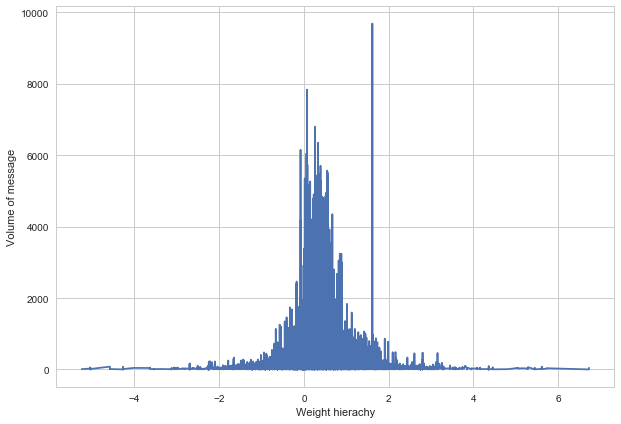

In [37]:
figure(figsize=(10, 7))
plt.plot(df_n['w'], df_n['v'],   '-')
plt.xlabel('Weight hierachy')
plt.ylabel('Volume of message')
plt.show()

Исследование зависимости количества получающих от веса иерархичности

In [38]:
lst_weight = []
lst_сount_rec = []
set_thread = list(set(emails_df.Number_of_thread))
for _, raw in emails_df.iterrows():
    weight = raw['weigh_content']
    recipiences = raw['To']
    lst_weight.append(weight)
    lst_сount_rec.append(len(recipiences))   

In [39]:
df_n = pd.DataFrame()
df_n['w'] = lst_weight
df_n['r'] = lst_сount_rec
df_n = df_n.sort_values(by = 'w')
df_n

,w,r
62769,-5.245392,1
62182,-5.245392,1
5468,-5.050021,1
23059,-5.050021,1
23058,-5.050021,1
27099,-5.050021,1
14852,-5.050021,1
16806,-5.050021,1
12144,-5.050021,1
15130,-5.050021,5


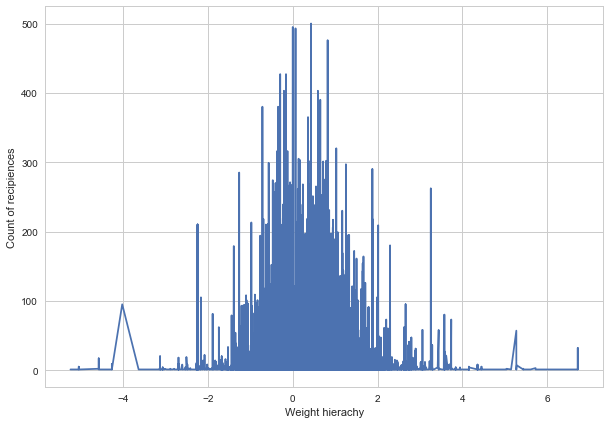

In [40]:
figure(figsize=(10, 7))
plt.plot(df_n['w'], df_n['r'],   '-')
plt.xlabel('Weight hierachy')
plt.ylabel('Count of recipiences')
plt.show()

Исследование зависимости длины треда от объема сообщений

In [55]:
lst_len = []
lst_volume = []
set_thread = list(set(emails_df.Number_of_thread))
for n in set_thread:
    if n == 0:
        continue
    df = emails_df[emails_df.Number_of_thread == n]
    if len(df) == 1:
        continue
        
    lens = []
    for content in df['clean_content']:
        if len(str(content).split(' '))>1:
            lens.append(len(str(content).split(' ')))
    lst_len.append(len(df))
    lst_volume.append(np.median(lens))   

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [56]:
df_n = pd.DataFrame()
df_n['l'] = lst_len
df_n['v'] = lst_volume
df_n = df_n.sort_values(by = 'v')
df_n.head()

,l,v
4829,2,2.0
1000,2,2.0
4278,2,2.0
3838,6,2.0
5973,2,2.0


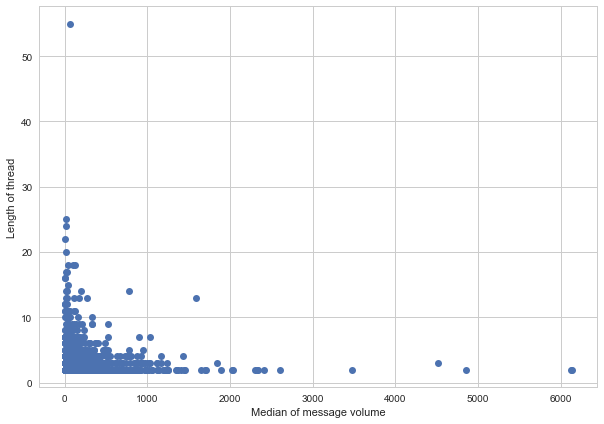

In [59]:
figure(figsize=(10, 7))
plt.plot(df_n['v'], df_n['l'],   'o')
plt.xlabel('Median of message volume')
plt.ylabel('Length of thread')
plt.show()

In [70]:
for _, row in emails_df.iterrows():
    ind = row['Index']
    message = row['clean_content']
    
    if len(str(message).split(' '))>5000:
        print(ind)

15168
27341
28200
28519
29068
30097
33663
38124
41806
42570
43860
44813
45968
46071
47019
48400
53883
57295
57892
58901
59097
59238
59589
60431
60829
62932


In [74]:
emails_df[emails_df['Index'] == 60829]

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread
60829,2000-12-12 07:55:00,"(rozenset({""'venturewire@venturewire.com'""})","(rozenset({""'jdasovic@enron.com'""})","venturewire, tuesdsay, december 12, 2000","\t?\t\r\r\r\n?\tVentureWire\r\r\r\n\tTuesday, ...",976596900.0,2000,venturewire tuesday december content company i...,0.146362,60829,30954


###### Исследование заивисимости времени ответа на сообщение от длины треда и объема сообщения

In [14]:
def count_threads(n):
    df_threads = emails_df[emails_df['Number_of_thread'] == n]
    return len(df_threads)
    
emails_df['count_threads'] = emails_df['Number_of_thread'].apply(lambda x: count_threads(x))

In [26]:
df_threads = emails_df[(emails_df['Number_of_thread'] != 0)]
df_threads

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,count_threads
0,2000-01-01 14:36:00,"(rozenset({""'sally.beck@enron.com'""})","(rozenset({""'fernley.dyson@enron.com'""})",happy new year - no y2k fear!,We are wrapping up several hours in the office...,946726560.0,2000,wrapping several hour office tested commodity ...,0.406400,0,31817,1
1,2000-01-01 19:17:00,"(rozenset({""'lenos@ucy.ac.cy'""})","(rozenset({""'gordon.sick@rogroup.com'""})",program attached; march ny ro conference/parti...,The current version of the conference program ...,946743420.0,2000,current version conference program attached pl...,0.186760,1,196,1
2,2000-01-02 13:12:00,"(rozenset({""'andrew.parsons@enron.com'""})","( "" 'mark.koenig@enron.com'"", "" 'joseph.sutto...",summary of y2k glitches,Following please find a summary of the minor Y...,946807920.0,2000,following please find summary minor related gl...,0.950536,2,2276,1
3,2000-01-03 06:17:00,"(rozenset({""'emoler@velaw.com'""})","( "" 'cynthia.sandherr@enron.com'""}, rozenset({...",options memo,Here's the options memo you requested. Happy ...,946869420.0,2000,option memo requested happy new year betsy doc...,0.000000,3,14978,1
4,2000-01-03 08:20:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'maureen.mcvicker@enron.com'""})",additions to working groups,yes -- just make sure the working group lead...,946876800.0,2000,yes make sure working group leader know mauree...,-0.324299,4,47838,1
5,2000-01-03 08:33:00,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'paul.kaufman@enron.com'""})",testimony in pge proceeding,I won't be able to attend. Let me know if I n...,946877580.0,2000,able attend let know need hooked phone brief a...,0.545584,5,39782,1
7,2000-01-03 09:32:00,"(rozenset({""'chris.dorland@enron.com'""})","(rozenset({""'jean.bell@enron.com'""})",reliant energy,The tag number on this deal is N67904.2\r\n\r\...,946881120.0,2000,tag number deal please address future deal inq...,0.000000,7,32020,1
11,2000-01-03 10:05:00,"(rozenset({""'tim.belden@enron.com'""})","( ""'texbasque@aol.com'""}, rozenset({"" 'richard...",capx investigation,"Richard,\r\nAttached, please find my analysis ...",946883100.0,2000,richard attached please find analysis position...,0.695248,11,32148,1
12,2000-01-03 15:18:00,"(rozenset({""'brent.hendry@enron.com'""})","(rozenset({""'mtaylo1@enron.com'""})",ba deal report,FYI\r\n---------------------- Forwarded by Bre...,946901880.0,2000,fyi forwarded brent hendry enron development c...,1.103487,12,15564,2
13,2000-01-03 19:01:00,"(rozenset({""'gdavid@mdck.com'""})","(rozenset({"" 'tedjlee@aol.com'"", "" 'marc_seku...",new telephone number for gail david,Even though I've given you my new phone number...,946915260.0,2000,even though given new phone number thought wou...,0.198088,13,22121,1


In [27]:
lst_delta_time = []
len_threads = []
volume_threads = []
for n in list(set(df_threads.Number_of_thread)):
    df = df_threads[df_threads.Number_of_thread == n]
    
    time = list(df.TimeAll)
    lst_time = []
    for t in range(len(time)-1):
        lst_time.append(float((time[t+1] - time[t])/3600))
    if len(lst_time) == 0:
        print(n)
    lst_delta_time.append(np.mean(lst_time))
    
    len_threads.append(len(df))
    
    lens = []
    for content in df['clean_content']:
        if len(str(content).split(' '))>1:
            lens.append(len(str(content).split(' ')))
    volume_threads.append(np.median(lens)) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
24
25
26
27
28
29
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
61
63
64
65
66
67
68
69
71
72
75
76
77
78
79
80
81
82
83
84
86
87
88
89
91
92
93
95
97
99
100
101
102
103
104
105
106
108
109
110
111
112
114
115
116
117
118
120
122
123
124
125
126
127
128
130
131
132
133
134
135
137
138
139
140
141
142
143
144
145
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
172
173
174
175
177
179
180
181
182
183
184
185
186
188
189
190
191
192
194
196
197
198
199
200
201
202
203
204
205
207
208
209
210
211
214
215
216
217
218
219
220
221
222
223
224
225
226
228
229
230
231
232
233
234
235
236
237
240
241


C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
266
267
268
271
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
291
292
293
294
295
296
297
298
299
300
301
302
303
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
336
337
338
339
340
341
342
343
344
345
347
348
349
350
351
352
353
354
355
356
358
359
360
361
362
364
366
367
368
370
371
372
373
374
375
376
377
379
380
381
382
383
384
385
387
388
389
392
393
394
395
396
397
398
399
400
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
421
424
427
429
430
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
457
458
459
460
461
462
463
464
465
466
469
470
471
472
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
490
491
493
494
495
496
498
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
519
520
521
523
524
525
526
527
528


2404
2405
2406
2407
2408
2409
2410
2411
2413
2414
2415
2417
2418
2419
2421
2422
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2444
2445
2446
2447
2449
2450
2451
2452
2453
2455
2456
2457
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2470
2471
2472
2473
2474
2475
2476
2477
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2497
2498
2502
2503
2504
2505
2507
2510
2511
2513
2514
2515
2516
2517
2518
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2543
2544
2546
2547
2549
2550
2551
2552
2553
2554
2555
2557
2558
2559
2560
2561
2564
2567
2568
2569
2570
2571
2572
2573
2575
2576
2577
2578
2579
2580
2581
2582
2584
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2606
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637


4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4420
4421
4422
4423
4425
4426
4427
4428
4429
4430
4433
4434
4435
4438
4440
4441
4442
4443
4444
4445
4448
4449
4450
4451
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4464
4465
4466
4467
4468
4469
4470
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4501
4502
4503
4504
4505
4506
4507
4508
4509
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4524
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4563
4564
4567
4568
4570
4571
4572
4573
4574
4575
4576
4577
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4593
4595
4596
4597
4598
4599
4600
4603
4604
4605
4606
4607
4608
4609
4610
4611
4614
4615
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4634
4635
4636
4637
4638
4639
4640
4641


6568
6569
6570
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6604
6605
6606
6608
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6626
6627
6629
6630
6631
6632
6635
6636
6637
6638
6640
6641
6642
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6657
6658
6660
6661
6662
6663
6665
6666
6667
6668
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6691
6692
6693
6694
6695
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6710
6711
6713
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6742
6743
6744
6745
6746
6747
6749
6750
6751
6752
6753
6754
6755
6756
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6770
6771
6772
6773
6774
6775
6777
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6794
6795


8522
8524
8525
8526
8527
8528
8529
8530
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8543
8544
8545
8546
8547
8548
8549
8550
8551
8553
8554
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8573
8574
8575
8576
8577
8579
8580
8581
8582
8583
8585
8586
8587
8588
8589
8590
8592
8594
8595
8596
8597
8598
8602
8603
8604
8606
8607
8609
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8662
8663
8664
8665
8666
8667
8668
8669
8670
8672
8673
8674
8675
8677
8681
8687
8689
8690
8693
8696
8697
8698
8699
8701
8702
8703
8704
8705
8706
8707
8708
8709
8711
8712
8713
8714
8715
8716
8718
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8731
8733
8735
8736
8737
8738
8739
8740
8741
8742
8744
8745
8746
8747
8748
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8764


10564
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10582
10583
10584
10585
10587
10588
10590
10591
10593
10594
10597
10598
10599
10600
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10618
10619
10620
10621
10622
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10639
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10659
10660
10661
10662
10663
10664
10665
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10684
10685
10686
10687
10688
10689
10690
10692
10693
10695
10696
10698
10699
10700
10701
10702
10703
10704
10705
10706
10708
10709
10710
10711
10712
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10727
10728
10731
10732
10733
10734
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
1075

12369
12371
12372
12373
12374
12375
12377
12378
12379
12380
12381
12382
12385
12387
12388
12389
12390
12391
12392
12394
12395
12396
12397
12398
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12415
12417
12418
12419
12420
12421
12422
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12438
12439
12440
12441
12442
12443
12444
12445
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12468
12469
12470
12471
12473
12474
12475
12476
12477
12478
12480
12482
12483
12484
12485
12486
12487
12488
12489
12490
12491
12492
12493
12494
12495
12497
12498
12499
12500
12501
12502
12503
12506
12507
12508
12509
12510
12511
12512
12513
12514
12515
12516
12518
12519
12520
12521
12522
12523
12524
12525
12527
12528
12529
12530
12533
12535
12536
12538
12539
12540
12541
12542
12544
12545
12546
12547
12549
12550
12551
12552
12553
12554
12555
12556
12557
12558
12559
12561
12562
12563
12564
12565
1256

14184
14185
14186
14188
14191
14192
14194
14195
14197
14198
14199
14200
14201
14203
14204
14205
14207
14208
14210
14211
14213
14214
14215
14216
14217
14219
14220
14221
14223
14224
14225
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14251
14252
14253
14254
14257
14258
14259
14260
14261
14262
14263
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14278
14279
14280
14282
14283
14284
14285
14286
14287
14289
14291
14292
14293
14294
14295
14296
14297
14298
14299
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14329
14330
14331
14332
14333
14334
14335
14336
14337
14340
14341
14343
14344
14345
14346
14347
14348
14350
14351
14354
14356
14357
14358
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14371
14372
14373
14374
14375
14376
14377
14379
14380
14381
14383
14384
1438

15971
15972
15973
15974
15975
15976
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15997
15998
15999
16000
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16062
16064
16065
16066
16067
16068
16069
16071
16072
16074
16075
16076
16077
16078
16079
16081
16082
16083
16084
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16098
16099
16100
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16125
16126
16127
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16142
16143
16144
16145
16146
16149
16150
16151
16152
16153
16154
16155
16156
1615

17757
17758
17759
17760
17762
17764
17765
17766
17767
17768
17769
17770
17771
17772
17773
17774
17775
17777
17778
17779
17780
17781
17782
17783
17785
17787
17788
17789
17791
17792
17793
17794
17795
17798
17799
17800
17801
17802
17803
17804
17805
17806
17809
17810
17811
17812
17813
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
17825
17826
17827
17828
17829
17831
17832
17833
17834
17836
17837
17838
17840
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17854
17855
17856
17857
17858
17859
17860
17861
17862
17863
17864
17865
17866
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17887
17888
17891
17892
17894
17895
17896
17897
17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17914
17915
17916
17917
17918
17919
17920
17921
17923
17924
17925
17926
17927
17928
17929
17930
17931
17933
17934
17935
17936
17937
17938
17939
17940
17942
17943
17944
17945
17946
17947
17948
1794

19542
19543
19544
19545
19546
19547
19548
19549
19551
19552
19553
19554
19555
19556
19557
19558
19559
19560
19561
19562
19563
19565
19566
19567
19568
19569
19570
19571
19572
19573
19574
19577
19578
19579
19580
19582
19583
19584
19585
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19613
19614
19615
19616
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19630
19631
19632
19633
19634
19635
19636
19638
19639
19640
19641
19643
19644
19645
19646
19648
19649
19650
19651
19652
19653
19654
19656
19657
19658
19659
19660
19661
19662
19663
19664
19667
19669
19670
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19698
19699
19700
19701
19703
19704
19705
19706
19707
19708
19710
19711
19712
19713
19714
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19730
19731
1973

21302
21303
21304
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21327
21328
21329
21330
21332
21334
21335
21336
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21369
21370
21371
21372
21373
21374
21376
21377
21378
21379
21380
21381
21382
21384
21385
21386
21388
21390
21391
21392
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21405
21406
21407
21408
21409
21411
21412
21413
21414
21415
21416
21417
21420
21421
21422
21423
21426
21427
21429
21430
21433
21434
21435
21436
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21450
21451
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21466
21467
21468
21469
21471
21472
21473
21474
21475
21476
21477
21478
21480
21481
21482
21483
21484
21485
21486
21487
21488
21490
21491
21493
21494
21495
21496
21497
2149

22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22964
22965
22966
22967
22968
22971
22972
22973
22974
22976
22978
22979
22980
22981
22982
22983
22984
22985
22986
22987
22988
22989
22990
22991
22993
22994
22996
22997
22998
22999
23000
23002
23003
23004
23005
23006
23007
23008
23009
23010
23013
23014
23015
23016
23017
23018
23019
23020
23021
23022
23023
23024
23025
23026
23027
23028
23029
23030
23032
23033
23036
23037
23038
23039
23040
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23118
23119
23120
23121
23122
23123
23124
23125
23126
2312

24595
24596
24597
24598
24599
24600
24601
24602
24603
24604
24605
24607
24609
24610
24611
24612
24613
24616
24617
24618
24621
24622
24623
24624
24625
24626
24627
24629
24630
24631
24632
24633
24635
24636
24637
24639
24640
24641
24642
24644
24645
24646
24648
24649
24650
24651
24652
24653
24654
24655
24656
24657
24658
24659
24660
24661
24662
24663
24664
24665
24666
24667
24668
24669
24670
24671
24673
24674
24675
24676
24677
24678
24679
24680
24681
24682
24683
24684
24685
24686
24690
24692
24693
24694
24695
24696
24697
24698
24699
24700
24702
24703
24704
24705
24707
24708
24710
24712
24714
24715
24716
24717
24718
24719
24721
24722
24723
24724
24725
24726
24727
24728
24729
24731
24733
24734
24735
24736
24737
24738
24739
24740
24741
24742
24743
24744
24745
24746
24747
24748
24750
24751
24752
24753
24756
24758
24759
24762
24763
24764
24765
24766
24767
24769
24770
24771
24772
24774
24775
24776
24777
24778
24779
24780
24784
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
2480

26354
26355
26356
26357
26358
26359
26361
26362
26363
26366
26367
26368
26369
26370
26371
26373
26375
26376
26377
26378
26379
26381
26383
26384
26385
26386
26387
26388
26389
26391
26392
26393
26394
26395
26396
26398
26399
26400
26401
26402
26403
26404
26405
26406
26407
26408
26409
26411
26412
26413
26414
26415
26416
26418
26420
26421
26422
26423
26424
26425
26426
26427
26428
26429
26430
26431
26432
26433
26435
26436
26437
26439
26440
26441
26442
26443
26444
26445
26446
26447
26448
26449
26450
26451
26452
26453
26454
26455
26456
26457
26459
26460
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26524
26525
26526
26527
26528
26529
26530
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
2654

28051
28052
28053
28054
28055
28056
28057
28059
28060
28061
28062
28064
28065
28066
28067
28068
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28119
28120
28122
28123
28124
28126
28127
28129
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28142
28145
28146
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
28162
28163
28164
28165
28166
28167
28168
28169
28170
28172
28173
28174
28175
28176
28177
28178
28179
28180
28181
28182
28183
28184
28185
28187
28188
28189
28190
28191
28192
28194
28195
28197
28198
28199
28200
28201
28202
28203
28204
28206
28207
28208
28209
28210
28211
28212
28213
28214
28215
28216
28217
28218
28219
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
28236
2823

29804
29805
29806
29807
29808
29809
29810
29812
29813
29815
29816
29817
29818
29819
29822
29823
29824
29825
29826
29827
29828
29830
29832
29833
29834
29835
29836
29839
29840
29842
29843
29844
29845
29847
29848
29849
29850
29851
29853
29854
29855
29856
29857
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29876
29877
29879
29880
29883
29884
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29899
29900
29901
29902
29903
29904
29905
29906
29908
29909
29910
29911
29912
29913
29914
29915
29918
29919
29920
29922
29923
29924
29925
29926
29927
29928
29931
29932
29933
29934
29935
29936
29937
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29953
29955
29956
29957
29958
29959
29961
29962
29963
29964
29966
29967
29968
29969
29970
29971
29972
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29993
29994
29995
29996
29997
29998
30000
30001
3000

31484
31485
31487
31488
31489
31490
31491
31492
31493
31495
31496
31498
31500
31501
31502
31503
31504
31505
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31520
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31534
31535
31536
31537
31538
31540
31541
31542
31543
31544
31546
31547
31548
31549
31551
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31565
31566
31567
31570
31571
31572
31573
31574
31575
31576
31577
31578
31580
31581
31582
31583
31584
31585
31586
31587
31588
31589
31590
31591
31592
31593
31594
31595
31596
31597
31598
31599
31600
31601
31602
31603
31604
31605
31606
31607
31608
31609
31610
31611
31612
31613
31614
31616
31617
31618
31619
31620
31621
31622
31623
31624
31625
31626
31627
31628
31629
31630
31631
31632
31634
31635
31637
31640
31641
31642
31643
31644
31645
31646
31647
31649
31650
31651
31652
31653
31655
31656
31657
31658
31659
31660
31661
31663
31664
31665
31667
31668
31669
31670
31671
31672
31673
31674
3167

33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
33172
33173
33174
33175
33176
33177
33178
33179
33181
33182
33183
33185
33186
33187
33188
33189
33190
33191
33193
33194
33196
33197
33199
33200
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33235
33236
33237
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33253
33254
33255
33258
33259
33260
33261
33262
33263
33264
33265
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33283
33284
33285
33286
33287
33288
33289
33290
33291
33293
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33311
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33335
33336
33337
33338
33339
33340
33341
33342
33343
3334

34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34928
34929
34930
34931
34932
34933
34935
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34959
34961
34962
34963
34964
34965
34966
34967
34968
34969
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35005
35006
35007
35008
35009
35010
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35024
35025
35026
35027
35028
35029
35030
35031
35032
35034
35035
35036
35037
35038
35040
35041
35042
35043
35044
35045
35047
35048
35049
35050
35051
35052
35053
35054
35057
35058
35059
35061
35062
35063
35064
35067
35068
35069
35070
35071
35072
35073
35074
35075
35076
35077
35078
35080
35081
35082
35084
35085
35086
35087
35090
35091
35092
35093
35094
35095
3509

36624
36625
36626
36627
36628
36629
36630
36631
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36657
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36699
36700
36701
36702
36704
36705
36706
36708
36709
36710
36711
36712
36713
36716
36717
36718
36719
36720
36722
36723
36724
36725
36727
36728
36729
36730
36731
36732
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36767
36768
36769
36770
36771
36773
36774
36775
36777
36778
36780
36781
36782
36783
36784
36787
36788
36789
36791
36792
36793
36794
36795
36796
36797
36800
36802
36803
36805
36806
36808
36809
36811
36812
36813
36814
36815
36816
3681

38417
38418
38419
38420
38421
38423
38425
38426
38427
38428
38429
38430
38431
38432
38433
38434
38435
38436
38437
38438
38439
38440
38441
38442
38443
38445
38447
38448
38449
38450
38451
38452
38453
38454
38456
38457
38458
38459
38460
38462
38464
38465
38466
38467
38468
38469
38470
38471
38472
38473
38474
38475
38476
38477
38478
38479
38481
38483
38484
38485
38486
38488
38489
38490
38491
38493
38495
38496
38497
38498
38499
38501
38502
38503
38504
38505
38506
38507
38508
38509
38510
38511
38512
38513
38514
38515
38516
38517
38518
38519
38520
38521
38522
38524
38525
38526
38528
38529
38530
38531
38532
38533
38534
38535
38536
38537
38538
38539
38541
38543
38544
38545
38547
38549
38551
38552
38553
38554
38555
38556
38557
38560
38561
38562
38563
38564
38565
38566
38567
38569
38571
38572
38574
38575
38577
38578
38579
38580
38581
38582
38583
38584
38585
38586
38587
38588
38589
38590
38591
38592
38593
38594
38596
38597
38599
38600
38601
38602
38603
38604
38605
38606
38607
38608
38609
38610
3861

40192
40193
40194
40195
40196
40197
40198
40199
40200
40203
40204
40205
40206
40207
40208
40209
40210
40211
40213
40214
40215
40217
40218
40219
40220
40221
40222
40223
40224
40225
40226
40227
40228
40230
40231
40232
40233
40236
40237
40238
40239
40240
40242
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40257
40258
40259
40260
40261
40262
40264
40265
40266
40267
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40283
40284
40285
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40304
40305
40306
40307
40308
40309
40310
40311
40313
40314
40315
40316
40317
40318
40319
40321
40322
40323
40324
40325
40326
40327
40328
40330
40331
40332
40333
40336
40337
40338
40340
40341
40342
40344
40345
40346
40348
40349
40351
40352
40353
40354
40357
40358
40359
40361
40362
40363
40364
40365
40366
40367
40368
40370
40371
40372
40373
40374
40375
40376
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
4038

41928
41929
41931
41932
41933
41934
41935
41936
41937
41938
41939
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
41961
41962
41963
41964
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
41977
41978
41979
41980
41981
41982
41983
41984
41985
41986
41987
41988
41989
41990
41991
41992
41993
41994
41995
41996
41997
41998
41999
42000
42001
42002
42003
42004
42005
42006
42007
42008
42009
42011
42013
42014
42015
42016
42017
42018
42020
42021
42022
42023
42024
42026
42027
42029
42030
42033
42035
42038
42040
42041
42042
42043
42045
42046
42047
42048
42049
42050
42051
42052
42053
42054
42055
42056
42057
42058
42059
42060
42061
42062
42063
42064
42065
42066
42067
42068
42069
42071
42072
42073
42074
42075
42077
42078
42079
42081
42082
42083
42084
42085
42086
42087
42088
42090
42091
42092
42094
42095
42096
42097
42098
42099
42100
42101
42102
42103
42104
42105
42106
42107
42108
42109
42110
42111
42112
4211

43699
43700
43701
43704
43705
43706
43707
43708
43709
43710
43712
43713
43714
43715
43716
43717
43718
43719
43720
43721
43722
43724
43725
43726
43727
43728
43729
43730
43732
43733
43734
43735
43736
43737
43740
43741
43742
43743
43744
43745
43747
43749
43750
43751
43752
43753
43755
43756
43757
43758
43759
43760
43761
43762
43764
43765
43766
43767
43768
43772
43773
43774
43775
43776
43777
43778
43779
43780
43781
43782
43783
43784
43785
43786
43787
43788
43789
43790
43791
43792
43794
43795
43796
43797
43799
43800
43801
43802
43803
43804
43805
43806
43807
43809
43813
43814
43815
43816
43817
43818
43819
43820
43821
43822
43823
43825
43826
43827
43828
43829
43831
43832
43833
43834
43835
43836
43837
43838
43839
43841
43842
43843
43845
43846
43847
43849
43850
43851
43852
43853
43854
43856
43857
43858
43859
43860
43861
43862
43863
43864
43865
43866
43867
43868
43869
43870
43871
43872
43873
43874
43875
43876
43877
43878
43879
43880
43881
43882
43883
43884
43885
43886
43887
43888
43889
43890
4389

45479
45481
45482
45483
45484
45485
45486
45487
45488
45489
45490
45492
45494
45495
45497
45498
45499
45500
45501
45503
45504
45505
45507
45508
45510
45511
45512
45513
45514
45515
45516
45517
45518
45519
45520
45521
45522
45523
45524
45525
45526
45527
45528
45530
45531
45532
45533
45535
45537
45541
45542
45543
45544
45545
45546
45547
45548
45549
45550
45551
45552
45553
45554
45555
45556
45557
45558
45559
45560
45561
45562
45563
45564
45565
45567
45568
45569
45570
45571
45572
45573
45574
45575
45576
45577
45578
45579
45580
45581
45582
45583
45584
45585
45586
45588
45590
45592
45593
45594
45595
45596
45598
45599
45600
45602
45603
45605
45606
45607
45608
45609
45610
45611
45612
45613
45615
45616
45617
45618
45619
45620
45621
45623
45625
45626
45628
45630
45631
45632
45634
45635
45637
45638
45640
45641
45642
45644
45645
45646
45647
45648
45649
45650
45651
45652
45653
45654
45655
45656
45657
45658
45659
45661
45662
45663
45664
45665
45666
45667
45668
45669
45670
45672
45673
45674
45675
4567

47148
47149
47150
47151
47152
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47204
47205
47206
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47223
47224
47225
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47263
47264
47266
47267
47268
47269
47270
47271
47272
47273
47274
47275
47276
47277
47278
47281
47282
47283
47284
47285
47287
47288
47289
47290
47291
47292
47293
47295
47297
47298
47299
47300
47301
47304
47306
47307
47308
47309
47310
47311
47312
47313
47314
47315
47316
47317
47318
47319
47320
47321
47322
47323
47324
47325
47326
47327
47328
47329
4733

48869
48870
48871
48872
48873
48874
48875
48876
48877
48878
48879
48880
48881
48882
48883
48884
48885
48886
48887
48888
48889
48891
48892
48893
48894
48895
48896
48897
48898
48899
48900
48901
48902
48903
48904
48905
48906
48909
48911
48912
48914
48915
48916
48917
48918
48919
48920
48921
48922
48923
48924
48925
48926
48927
48928
48929
48930
48931
48932
48933
48934
48935
48936
48937
48938
48940
48941
48942
48943
48944
48945
48946
48947
48948
48949
48951
48952
48953
48954
48955
48956
48957
48958
48959
48960
48961
48962
48963
48964
48965
48966
48967
48968
48969
48970
48971
48972
48973
48975
48976
48977
48978
48980
48981
48982
48983
48984
48985
48986
48987
48988
48989
48990
48991
48992
48993
48994
48995
48996
48997
48998
48999
49000
49001
49002
49003
49004
49005
49006
49007
49009
49010
49011
49012
49015
49017
49018
49020
49021
49022
49026
49027
49028
49029
49030
49031
49032
49033
49034
49035
49036
49037
49038
49039
49040
49041
49042
49043
49044
49045
49046
49047
49048
49049
49050
49051
4905

50556
50557
50558
50559
50560
50561
50562
50563
50564
50565
50566
50567
50568
50569
50570
50571
50572
50573
50574
50575
50576
50578
50579
50580
50581
50582
50583
50584
50585
50586
50587
50589
50590
50591
50592
50593
50594
50596
50597
50598
50599
50601
50603
50605
50606
50607
50608
50609
50610
50613
50614
50615
50616


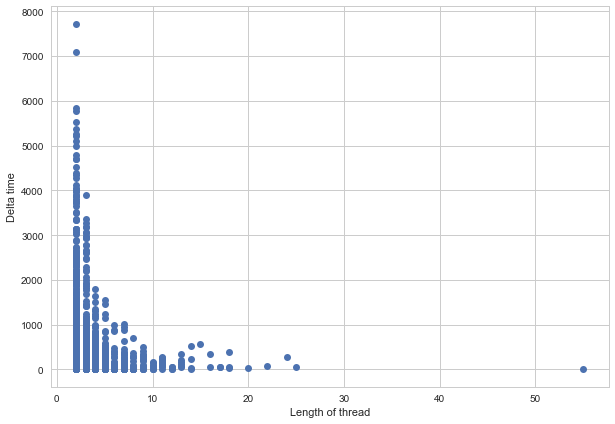

In [28]:
df_n = pd.DataFrame()
df_n['l'] = len_threads
df_n['d'] = lst_delta_time
df_n = df_n.sort_values(by = 'l')
figure(figsize=(10, 7))
plt.plot(df_n['l'], df_n['d'],   'o')
plt.xlabel('Length of thread')
plt.ylabel('Delta time')
plt.show()

In [32]:
volume_threads

[46.0,
 572.0,
 115.0,
 70.0,
 58.0,
 113.0,
 115.0,
 13.0,
 166.0,
 31.0,
 9.0,
 24.0,
 23.0,
 54.0,
 2.0,
 24.0,
 22.0,
 1022.0,
 39.0,
 149.0,
 30.0,
 428.0,
 53.0,
 6.0,
 90.0,
 6.0,
 105.0,
 8.0,
 32.0,
 142.0,
 205.0,
 159.0,
 480.0,
 38.0,
 63.0,
 100.0,
 100.0,
 198.0,
 233.0,
 53.0,
 44.0,
 29.0,
 1314.0,
 2.0,
 4.0,
 11.0,
 70.0,
 31.0,
 167.0,
 42.0,
 352.0,
 570.0,
 147.0,
 28.0,
 169.0,
 169.0,
 54.0,
 98.0,
 187.0,
 226.0,
 19.0,
 11.0,
 3.0,
 657.0,
 30.0,
 28.0,
 9.0,
 2.0,
 4619.0,
 26.0,
 13.0,
 18.0,
 308.5,
 39.5,
 642.0,
 112.0,
 733.0,
 748.0,
 31.0,
 13.0,
 28.0,
 253.0,
 305.0,
 100.0,
 17.0,
 13.0,
 28.0,
 141.0,
 106.0,
 282.5,
 56.0,
 471.0,
 186.0,
 92.5,
 97.0,
 100.5,
 169.0,
 45.5,
 91.0,
 26.0,
 3.0,
 162.0,
 47.0,
 109.0,
 392.0,
 607.0,
 96.0,
 92.0,
 286.0,
 141.0,
 158.0,
 53.0,
 119.0,
 15.0,
 14.0,
 148.0,
 83.0,
 27.0,
 7.0,
 160.0,
 126.0,
 97.0,
 22.0,
 76.0,
 85.0,
 3.0,
 275.0,
 36.0,
 9.0,
 898.0,
 322.0,
 132.0,
 162.0,
 201.0,
 177.0,
 207.

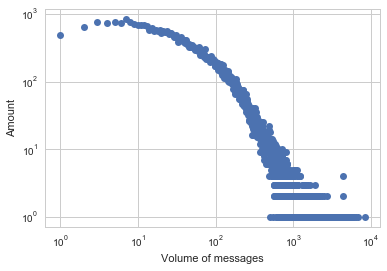

In [52]:
counter_lt = Counter(v)
plt.loglog (list(counter_lt.keys()), list(counter_lt.values()), 'o')
plt.xlabel('Volume of messages')
plt.ylabel('Amount')
plt.show()

In [ ]:
counter_lt = Counter(v)
plt.loglog (list(counter_lt.keys()), list(counter_lt.values()), 'o')
plt.xlabel('Volume of messages')
plt.ylabel('Amount')
plt.show()

In [42]:
df_threads = df_threads.dropna()

In [47]:
v = []
for c in df_threads.clean_content:
    v.append(len(c.split()))

In [48]:
v

[61,
 47,
 228,
 9,
 120,
 71,
 16,
 56,
 282,
 62,
 47,
 59,
 976,
 84,
 959,
 253,
 95,
 98,
 109,
 48,
 34,
 20,
 956,
 80,
 141,
 213,
 15,
 61,
 40,
 47,
 15,
 11,
 7,
 288,
 325,
 1467,
 328,
 19,
 543,
 182,
 36,
 1511,
 7,
 93,
 33,
 17,
 7,
 32,
 107,
 3,
 13,
 17,
 19,
 73,
 3,
 181,
 357,
 15,
 60,
 12,
 48,
 16,
 10,
 6,
 137,
 56,
 103,
 26,
 81,
 5,
 170,
 8,
 78,
 336,
 61,
 119,
 114,
 142,
 37,
 94,
 59,
 70,
 29,
 76,
 155,
 83,
 46,
 124,
 89,
 26,
 22,
 3,
 80,
 21,
 278,
 101,
 288,
 152,
 186,
 83,
 254,
 53,
 229,
 22,
 60,
 6,
 31,
 18,
 63,
 77,
 108,
 198,
 93,
 199,
 18,
 38,
 69,
 101,
 65,
 705,
 27,
 56,
 131,
 48,
 30,
 9,
 4,
 23,
 99,
 51,
 22,
 64,
 196,
 188,
 17,
 9,
 18,
 80,
 16,
 281,
 13,
 8,
 15,
 3,
 58,
 14,
 26,
 37,
 10,
 107,
 73,
 45,
 6,
 37,
 17,
 1860,
 187,
 15,
 13,
 24,
 46,
 72,
 58,
 12,
 16,
 16,
 109,
 205,
 83,
 251,
 472,
 130,
 66,
 133,
 30,
 32,
 119,
 138,
 18,
 194,
 47,
 80,
 122,
 135,
 289,
 11,
 4,
 3,
 66,
 2,
 17,
 5

In [41]:
len(df_threads.clean_content[0].split())

61

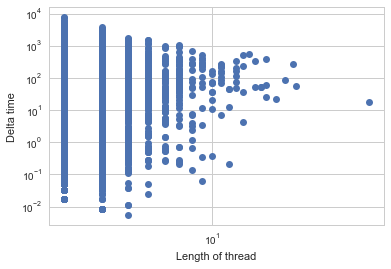

In [19]:
plt.loglog(df_n['l'], df_n['d'],   'o')
plt.xlabel('Length of thread')
plt.ylabel('Delta time')
plt.show()

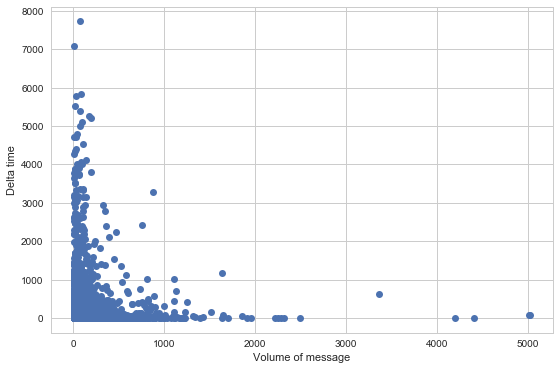

In [56]:
df_n = pd.DataFrame()
df_n['v'] = volume_threads
df_n['d'] = lst_delta_time
df_n = df_n.sort_values(by = 'v')
figure(figsize=(9, 6))
plt.plot(df_n['v'], df_n['d'],  'o')
plt.xlabel('Volume of message')
plt.ylabel('Delta time')
plt.show()

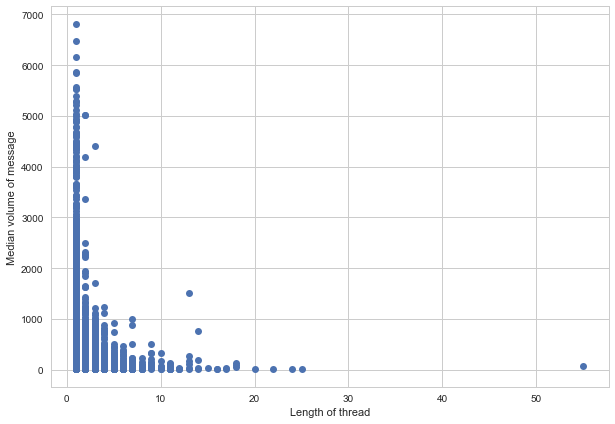

In [60]:
df_n = pd.DataFrame()
df_n['v'] = volume_threads
df_n['d'] = lst_delta_time
df_n = df_n.sort_values(by = 'v')
figure(figsize=(10, 7))
plt.plot(len_threads, volume_threads,  'o')
plt.ylabel('Median volume of message')
plt.xlabel('Length of thread')
plt.show()

Исследование тредов между двумя людьми

In [127]:
df_threads1 = df_threads.loc[df_threads['To'].map(len) == 1]
df_threads1

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,count_threads
12,2000-01-03 15:18:00,"(rozenset({""'brent.hendry@enron.com'""})","(rozenset({""'mtaylo1@enron.com'""})",ba deal report,FYI\r\r\r\n---------------------- Forwarded by...,946901880.0,2000,fyi forwarded brent hendry enron development p...,0.757287,12,487,2
20,2000-01-04 08:27:00,"(rozenset({""'mark.taylor@enron.com'""})","(rozenset({""'mark.elliott@enron.com'""})",new pulpex document needed for trading in london,"Mark,\r\r\r\n\r\r\r\nYou might want to check w...",946963620.0,2000,mark might want check paul arranged ipe tradin...,0.460433,20,46811,2
26,2000-01-04 09:49:00,"(rozenset({""'elizabeth.sager@enron.com'""})","(rozenset({""'brenda.whitehead@enron.com'""})",draft letter,---------------------- Forwarded by Elizabeth ...,946968540.0,2000,forwarded elizabeth sager hou ect jeffrey c al...,-1.218255,26,32847,2
38,2000-01-04 11:47:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'alicia.goodrow@enron.com'""})",dinner,I will attend. Let me know what I need to br...,946975620.0,2000,attend let know need bring thanks message,-0.156430,38,29628,4
42,2000-01-04 12:11:00,"(rozenset({""'vince.kaminski@enron.com'""})","(rozenset({""'candace.womack@enron.com'""})",vincent tang,"Candace, \r\r\r\n\r\r\r\nSorry for the delay....",946977060.0,2000,candace sorry delay shall edit job description...,-0.278080,42,13091,3
46,2000-01-04 12:47:00,"(rozenset({""'kenneth.seaman@enron.com'""})","(rozenset({""'daren.farmer@enron.com'""})",industrials,Suggestions......\r\r\r\n---------------------...,946979220.0,2000,suggestion forwarded kenneth seaman hou ect pm...,-0.627513,46,43295,2
56,2000-01-04 14:04:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'alicia.goodrow@enron.com'""})",dinner,Will you be at the same dinner? How goes the ...,946983840.0,2000,dinner go house,0.000000,56,29628,4
69,2000-01-04 16:15:00,"(rozenset({""'daren.farmer@enron.com'""})","(rozenset({""'imelda.frayre@enron.com'""})",sitara security,"Imelda, \r\r\r\n\r\r\r\nThe following people (...",946991700.0,2000,imelda following people hpl logistics need acc...,-0.222607,69,16295,3
70,2000-01-04 16:20:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'alicia.goodrow@enron.com'""})",dinner,"It would be nice if you could be at my dinner,...",946992000.0,2000,would nice could dinner since probably know an...,0.075151,70,29628,4
73,2000-01-04 16:51:00,"(rozenset({""'donald.reinhardt@enron.com'""})","(rozenset({""'daren.farmer@enron.com'""})","c&e operating, 11/99 production",Set out below is information regarding 660 MMB...,946993860.0,2000,set information regarding mmbtu produced novem...,-0.484906,73,7875,2


Треды в которых получатели не являются отправителями

In [157]:
def answer_not(From):
    if len(set(From)) == 1:
        return 0
    else:
        return 1
dict_threads_answer = {}    
for n in list(set(df_threads.Number_of_thread)):
    if n == 0:
        continue
    df = df_threads[df_threads.Number_of_thread == n]
    dict_threads_answer[n] = answer_not(list(df['From']))

df_threads['answer'] = df_threads['Number_of_thread'].apply(lambda x: dict_threads_answer[x])

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Исследоване фраз, влияющих на длину треда

In [169]:
df_threads_a = df_threads[df_threads.answer == 1]
df_threads_a

,Date,From,To,Subject,content,TimeAll,Year,clean_content,weigh_content,Index,Number_of_thread,count_threads,answer
42,2000-01-04 12:11:00,"(rozenset({""'vince.kaminski@enron.com'""})","(rozenset({""'candace.womack@enron.com'""})",vincent tang,"Candace, \r\r\r\n\r\r\r\nSorry for the delay....",946977060.0,2000,candace sorry delay shall edit job description...,-0.278080,42,13091,3,1
73,2000-01-04 16:51:00,"(rozenset({""'donald.reinhardt@enron.com'""})","(rozenset({""'daren.farmer@enron.com'""})","c&e operating, 11/99 production",Set out below is information regarding 660 MMB...,946993860.0,2000,set information regarding mmbtu produced novem...,-0.484906,73,7875,2,1
137,2000-01-05 13:46:00,"(rozenset({""'elizabeth.sager@enron.com'""})","(rozenset({""'gacox@gsi-net.com'""})",tennis,On?\r\r\r\n\r\r\r\nName the time (400?) and th...,947069160.0,2000,name time spot met e,0.000000,137,26973,2,1
171,2000-01-05 19:05:00,"(rozenset({""'gacox@gsi-net.com'""})","(rozenset({""'elizabeth.sager@enron.com'""})",tennis,>On? okey-dokey\r\r\r\n>\r\r\r\n>Name the tim...,947088300.0,2000,okey dokey name time spot met met palm reserve...,0.693419,171,26973,2,1
199,2000-01-06 10:13:00,"(rozenset({""'benjamin.rogers@enron.com'""})","(rozenset({""'thz@compuserve.com'""})",email,Here is the presentation Don and I have been w...,947142780.0,2000,presentation working copy linda miller please ...,0.831775,199,13150,2,1
230,2000-01-06 14:48:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,How goes figuring out why our positions were s...,947159280.0,2000,go figuring position far,0.000000,230,17265,7,1
231,2000-01-06 15:00:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,I don't know what you mean about the positions...,947160000.0,2000,know mean position defunct,0.000000,231,17265,7,1
239,2000-01-06 15:30:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,We have no idea! We rely on you to tell us wh...,947161800.0,2000,idea rely tell u position,0.000000,239,17265,7,1
242,2000-01-06 15:48:00,"(rozenset({""'thz@compuserve.com'""})","(rozenset({""'benjamin.rogers@enron.com'""})",email,Ben:\r\r\r\n\r\r\r\nI received your message an...,947162880.0,2000,ben received message look forward seeing prese...,-0.357059,242,13150,2,1
243,2000-01-06 15:51:00,"(rozenset({""'tana.jones@enron.com'""})","(rozenset({""'tobin.carlson@enron.com'""})",limits,Without calling each of the respective traders...,947163060.0,2000,without calling respective trader know position,0.000000,243,17265,7,1


In [183]:
dict_labels_large = {}
for n in list(set(df_threads_a.Number_of_thread)):
    df = df_threads_a[df_threads_a.Number_of_thread == n]
    if len(df) < 5:
        dict_labels_large[n] = 0
    else:
        dict_labels_large[n] = 1
df_threads_a['label_large'] = df_threads_a.Number_of_thread.apply(lambda x: dict_labels_large[x])

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [184]:
Counter(df_threads_a.label_large)

Counter({0: 6474, 1: 1359})

In [192]:
df_threads_a = df_threads_a.dropna()

In [542]:
data_train, data_test, y_train, y_test = train_test_split(df_threads_a['clean_content'].values, 
                                                          df_threads_a['count_threads'].values, test_size=0.25)

In [543]:
vect = TfidfVectorizer(sublinear_tf=True, use_idf=True)
#vect = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.4, min_df=5)
X_train = vect.fit_transform(data_train)
X_test = vect.transform(data_test)
feature = vect.get_feature_names()

In [532]:
feature

['aa',
 'aaa',
 'ab',
 'abb',
 'abbanat',
 'ability',
 'able',
 'aboard',
 'abraham',
 'abramo',
 'abrams',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbing',
 'abstract',
 'ac',
 'academic',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accessing',
 'accommodate',
 'accommodated',
 'accommodation',
 'accomodate',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accrual',
 'accrued',
 'accuracy',
 'accurate',
 'accurately',
 'aceves',
 'achievable',
 'achieve',
 'achieved',
 'achievement',
 'acknowledge',
 'acknowledged',
 'acknowledgement',
 'acknowledges',
 'acounts',
 'acquire',
 'acquired',
 'acquires',
 'acquiring',
 'acquisition',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'actively',
 'activity',
 'acton',
 'actual',
 'actually',
 'actuals',
 'acutally',
 'ad',
 'adam',
 'adam

In [544]:
select_featurs = SelectKBest(k=k)
X_train_new = select_featurs.fit_transform(X_train, y_train)
X_test_new = select_featurs.transform(X_test)

In [545]:
cross_val_score(LogisticRegression(C = 20, penalty='l2', intercept_scaling = 0.5), 
                X_train, y_train, cv=3).mean()

0.70532726010015379

In [548]:
clf = LogisticRegression(C = 20, penalty='l2', intercept_scaling = 1)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
metrics.accuracy_score(predict, y_test)

0.75613496932515334

In [523]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          2       0.76      0.88      0.81       916
          3       0.71      0.68      0.70       456
          4       0.84      0.69      0.76       231
          5       0.80      0.66      0.73       128
          6       0.92      0.83      0.87        58
          7       0.91      0.60      0.73        53
          8       0.88      0.72      0.79        29
          9       1.00      0.65      0.79        23
         10       0.80      0.36      0.50        11
         11       0.57      0.44      0.50         9
         12       1.00      0.60      0.75         5
         13       1.00      0.33      0.50         3
         14       0.00      0.00      0.00         4
         15       1.00      1.00      1.00         7
         17       1.00      1.00      1.00         2
         18       1.00      0.60      0.75         5
         20       1.00      0.43      0.60         7
         24       1.00      0.22      0.36   

In [468]:
coef = clf.coef_
np.min(coef[0])

-11.369954233511754

In [506]:
from sklearn.feature_selection import SelectKBest

for k in range(2, 100, 5):
    select_featurs = SelectKBest(k=k)
    X_train_new = select_featurs.fit_transform(X_train, y_train)
    X_test_new = select_featurs.transform(X_test)

    clf = LogisticRegression(C = 20, penalty='l1', intercept_scaling = 0.5)
    clf.fit(X_train_new, y_train)
    predict = clf.predict(X_test_new)
    print(metrics.accuracy_score(predict, y_test))

0.470858895706
0.472392638037
0.474437627812
0.475971370143
0.475971370143
0.476993865031
0.479550102249
0.475971370143
0.475971370143
0.477505112474
0.480572597137
0.481595092025
0.481595092025
0.481595092025
0.481595092025
0.481083844581
0.480572597137
0.480572597137
0.481595092025
0.481595092025


In [304]:
len(coef[0])

21471

Зависимость количества людей, которые не пишут в треде от длины треда

In [20]:
length_threads = []
amount_people_off = []
for n in set_thread:
    if n == 0: continue
    df1 = emails_df[(emails_df.Number_of_thread == n)]
    
    a = set()
    for rec in df1.To:
        for r in rec:
            a.add(r)

    for i in df1.From[1:]:
        if i in a:
            a.remove(i)
    amount_people_off.append(len(a))
    
    #timeAll = list(df1.TimeAll)
    #for t in range(len(timeAll)-1):
        #if (timeAll[t+1] - timeAll[t]) < 5:
            #firstToDeleteID = list(df1[df1.TimeAll == timeAll[t+1]].Index)[0]
            #df1 = df1[df1.Index != firstToDeleteID]
      
    length_threads.append(len(df1))

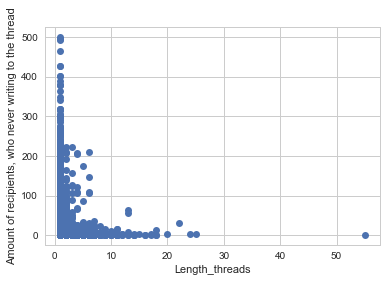

In [49]:
plt.plot(length_threads, amount_people_off, 'o')
plt.ylabel('Amount of recipients, who never writing to the thread')
plt.xlabel('Length_threads') 

In [51]:
for n in set_thread:
    df1 = emails_df[(emails_df.Number_of_thread == n)]
    if len(df1) > 100:
        print(n, len(df1))

0 4773


###### LDA модель и кластеризация сообщений

In [4]:
analysis_df=emails_df[['From', 'To', 'Date','content']].dropna().copy()
analysis_df = analysis_df.loc[analysis_df['To'].map(len) == 1]
sub_df=analysis_df

In [5]:
analysis_df

,From,To,Date,content
0,"(rozenset({""'sally.beck@enron.com'""})","(rozenset({""'fernley.dyson@enron.com'""})",2000-01-01 14:36:00,We are wrapping up several hours in the office...
1,"(rozenset({""'lenos@ucy.ac.cy'""})","(rozenset({""'gordon.sick@rogroup.com'""})",2000-01-01 19:17:00,The current version of the conference program ...
4,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'maureen.mcvicker@enron.com'""})",2000-01-03 08:20:00,yes -- just make sure the working group lead...
5,"(rozenset({""'steven.kean@enron.com'""})","(rozenset({""'paul.kaufman@enron.com'""})",2000-01-03 08:33:00,I won't be able to attend. Let me know if I n...
6,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'cliff.lawrick@enron.com'""})",2000-01-03 09:29:00,Cliff I want to add a seat between Chad and th...
7,"(rozenset({""'chris.dorland@enron.com'""})","(rozenset({""'jean.bell@enron.com'""})",2000-01-03 09:32:00,The tag number on this deal is N67904.2\r\r\r\...
8,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'david.oxley@enron.com'""})",2000-01-03 09:41:00,David\r\r\r\n\r\r\r\nI'm going to extend and o...
9,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'dawn.doucet@enron.com'""})",2000-01-03 09:44:00,"Dawn, call me on Lambie and Brodeur."
10,"(rozenset({""'john.lavorato@enron.com'""})","(rozenset({""'john.sherriff@enron.com'""})",2000-01-03 09:47:00,"John, I thought I would send you a note to out..."
12,"(rozenset({""'brent.hendry@enron.com'""})","(rozenset({""'mtaylo1@enron.com'""})",2000-01-03 15:18:00,FYI\r\r\r\n---------------------- Forwarded by...


In [510]:
#sub_df["content"]=sub_df["content"].map(clean)
text_clean=[]
for text in sub_df['content']:
    text_clean.append(clean(text).split())

In [512]:
dictionary = corpora.Dictionary(text_clean)
text_term_matrix = [dictionary.doc2bow(text) for text in text_clean]

In [513]:
text_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(34, 2),
  (35, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 3),
  (60, 2),
  (61, 2),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1

In [18]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(text_term_matrix, num_topics=5000, id2word = dictionary)

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim-2.1.0-py3.6-win-amd64.egg\gensim\models\ldamodel.py:694: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [19]:
ldamodel.save('LDA_model_5000')

In [6]:
eng_stopwords = set(stopwords.words('english'))
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

emails_df["clean_content"]=emails_df.content.apply(clean_text)

In [527]:
wordvector = TfidfVectorizer(analyzer='word', stop_words='english', max_df=0.4, min_df=5)
wordvector_fit = wordvector.fit_transform(emails_df.clean_content)
feature = wordvector.get_feature_names()

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [11]:
N = 5
clf = KMeans(n_clusters=N)
labels = clf.fit_predict(wordvector_fit)

In [546]:
wordvector_fit_2d = wordvector_fit.todense()
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

In [547]:
wordvector_fit_2d

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

C:\Users\aemelyanova\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


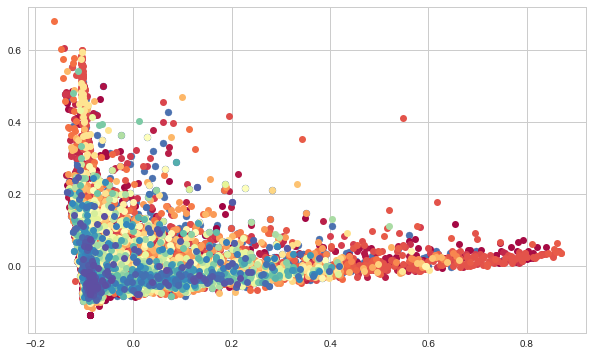

In [26]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
pylab.figure(figsize = (10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = datapoint[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=7)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1])
plt.show()

#### Нахождение слов способствующих длинным тредам и большим объемам сообщений